# Lineer Regresyon

Dr. Suat ATAN

2018 Ankara

## Formülasyon

$\hat{y}_i=\theta_0+\theta_1 x_1 + \theta_2 x_2 +\theta_3 x_3 + . . .+\theta_n x_n$

$i$ gözlemi için, gözlem değerlerimiz ise $X_i$ olsun. Ağırlıklarımız $\theta$ olsun. Bu gözlemin gerçek değeri $y=2.5$ olsun.  Her bir değeri diğeri ile çarpıp toplamlarını almak istiyoruz. Bu toplamın bizde tahmin edeceğimiz $\hat{y}$ değerini vereceğini düşünüyoruz. $\theta$ ve $x$ değerlerimizi vektör olarak yazarsak:

$
\theta=\begin{bmatrix}
1 \\ 2  \\ 3
\end{bmatrix} 
$

$
X_i=\begin{bmatrix}
0.2 \\ 0.3  \\ 0.4
\end{bmatrix} 
$

In [3]:
1*0.2+2*0.3+3*0.4

Bulduğumuz değer gerçek değerimiz olan 4'e yakın.

Bu işlemi matris çarparak yapalım.

In [4]:
import numpy as np
teta=np.array([[1],[2],[3]])
teta

array([[1],
       [2],
       [3]])

In [5]:
X=np.array([[0.2],[0.3],[0.4]])
X

array([[ 0.2],
       [ 0.3],
       [ 0.4]])

In [6]:
np.transpose(teta)

array([[1, 2, 3]])

In [7]:
np.dot(np.transpose(teta),X)

array([[ 2.]])

[Nokta çarpım](https://www.wikiwand.com/en/Dot_product) ile teta değerlerimizi transpoze ettikten sonra  X ile çarptığımızda **tek bir** sayısal değer elde ediyoruz. Bu *predict* edilen değerdir. Bu değer gerçek değerle karşılaştırılmalıdır.

## Hangi Teta Vektörü Daha Güçlü Tahminleri Yapıyor

Diyelim ki iki arkadaşımız gidip farklı algoritmalar kullanarak $\theta$ değerleri elde ettiler. Agah bir algoritma kullanarak bir bir $\theta$ değeri hesapladı buna $A$ diyelim, sonra da Hakan da başka $\theta$ değerleri hesapladı buna da $H$ diyelim. 

Şimdi hangi $\theta$ değerleri daha güçlü tahmin yapar diye merak ettik. Bunu hesaplamanın iki yolu vardır: 

- RMSE (*Root Mean Sqauare Error*): Hataların karelerinin toplamının kare kökü

- MAE (*Mean Absolute Error*): Hataların mutlak değerleri toplamı

MAE sıfır ise RMSE de sıfırdır. Bu durumda modelde hiç hata yoktur. Başka bir deyimle model her tahmininde tam isabet tutturduğundan tahmin ile gerçek arasındaki farklar (yani hata değeri) hep sıfır olacağından RMSE de MAE de sıfır çıkar.

Şimdi Agah'ın da Hakan'ın da $\theta$ değerlerini RMSE veya MAE ile hesaplayarak karşılaştırabilir ve hangi modelin daha iyi olduğunu ortaya çıkarabiliriz.

MAE mi yoksa RMSE'nin mi daha iyi olduğunu sonra anlatacağız.

Şimdi önce MAE'nin formülünü anlatıp sonra MAE ile hesaplama yapalım:

$
MAE(X,h)=\frac{1}{m}\sum \left | h(x_i)-y^{(i)}) \right |
$

Burada $h(x_i)$ değeri elimizdeki $\theta$ değerleri ile $x$ değerlerini çarparak elde ettiğimiz $\hat{y}$ değeri iken $y_{(i)}$ değeri bilinen gerçek değerdir.

Şimdilik elimizde sadece bir gözlem olduğundan $m=1$, $h(x_i)=2$ çünkü yukarıda 2 bulduk, elimizdeki gerçek $y$ değeri ise $2.5$ idi. Buna göre hatamız $0.5$ olacaktır.

Biraz kafa karıştırıcı gelebilir ancak devam edelim. Diyelim ki elimizde $y$ değerlerini bildiğimiz 3 değer var.

$
X_1=\begin{bmatrix}
0.2 \\ 0.3  \\ 0.4
\end{bmatrix} 
$

$
X_2=\begin{bmatrix}
0.33 \\ 0.22  \\ 0.11
\end{bmatrix} 
$

$
X_3=\begin{bmatrix}
0.66 \\ 0.83  \\ 0.99
\end{bmatrix} 
$

Bu $X$ değerleri için bilinen $y$ etiket değerleri ise

$y_1=4$ , $y_2=3.3$, $y_3=5.2$ olsun.


$\theta$ değerlerimiz ise Agahın verdiği

$
A=\begin{bmatrix}
1 \\ 2  \\ 3
\end{bmatrix} 
$

ve Hakan'ın verdiği

$
H=\begin{bmatrix}
1.5 \\ 2.2  \\ 3.3
\end{bmatrix} 
$

Şimdi Agah ve Hakan'ın verdiği değerler için $MAE$ hesaplayarak hangisinin daha gerçek olduğunu hesaplayalım.


In [8]:
x1=np.array([[0.2],[0.3],[0.4]])
x2=np.array([[0.33],[0.22],[0.11]])
x3=np.array([[0.66],[0.83],[0.99]])
y1,y2,y3=4,3.3,5.2
teta_agah=np.array([[1],[2],[3]])
teta_hakan=np.array([[1.5],[2.2],[3.3]])

#agahın tetalarına göre tahminler
tahmin1=np.dot(np.transpose(teta_agah),x1)
tahmin2=np.dot(np.transpose(teta_agah),x2)
tahmin3=np.dot(np.transpose(teta_agah),x3)

#farkların mutlak değeri
hata1=abs(tahmin1-y1)
hata2=abs(tahmin2-y2)
hata3=abs(tahmin3-y3)


#hataların mutlak değerlerini ortalaması
toplam=hata1+hata2+hata3
ortalama=toplam/3
ortalama
#agah'ın verdiği matrisin MAE değeri:

array([[ 1.43]])

In [9]:
#hakanın tetalarına göre tahminler
tahmin1=np.dot(np.transpose(teta_hakan),x1)
tahmin2=np.dot(np.transpose(teta_hakan),x2)
tahmin3=np.dot(np.transpose(teta_hakan),x3)

#farkların mutlak değeri
hata1=abs(tahmin1-y1)
hata2=abs(tahmin2-y2)
hata3=abs(tahmin3-y3)


#hataların mutlak değerlerini ortalaması
toplam=hata1+hata2+hata3
ortalama=toplam/3
ortalama

array([[ 1.52033333]])

Agah'ın MAE değeri daha küçük olduğundan modeli daha iyi görünüyor. Agah'ın modelini seçeriz.

Peki her seferinde hataları böyle tek tek toplayacak mıyız. Hakan için kısaltalım:

## Toplu Matrisleştirme

$x$ değerlerimizi birleştirelim

In [10]:
np.concatenate((x1,x2,x3))

array([[ 0.2 ],
       [ 0.3 ],
       [ 0.4 ],
       [ 0.33],
       [ 0.22],
       [ 0.11],
       [ 0.66],
       [ 0.83],
       [ 0.99]])

Olmadı. Şimdi axis=1 yaparak yan yana yerleştirelim

In [11]:
Xler=np.concatenate((x1,x2,x3),axis=1)
Xler

array([[ 0.2 ,  0.33,  0.66],
       [ 0.3 ,  0.22,  0.83],
       [ 0.4 ,  0.11,  0.99]])

Şimdi tahminleri hesaplamak için matris düzeyinde işlem yapalım

In [12]:
nokta_carpim=np.transpose(teta_hakan)*Xler
nokta_carpim

array([[ 0.3  ,  0.726,  2.178],
       [ 0.45 ,  0.484,  2.739],
       [ 0.6  ,  0.242,  3.267]])

Her bir değer ilgili $x_i$ değeri ile tekabül eden $\theta$ çarpımına tekabül editor. Satır toplamı aldığımızda ise (ağırlıklı toplam) her bir gözlem için tahmin değerlerini hesaplamış olacağız.

In [13]:
tahminler=np.sum(nokta_carpim,axis=1)
tahminler

array([ 3.204,  3.673,  4.109])

Bakalım daha önce hesapladığımız tahminlerimizle aynı mı?

In [14]:
tahmin1,tahmin2,tahmin3

(array([[ 2.28]]), array([[ 1.342]]), array([[ 6.083]]))

Daha önceki tahminlerimizle aynı hesapladık. Sağlamayı yapmış olduk.Şimdi farkları topluca alalım. Önce eski hesapladıklarımızı kontrol için tekrar inceleyelim

In [15]:
tahmin1-y1,tahmin2-y2,tahmin3-y3

(array([[-1.72]]), array([[-1.958]]), array([[ 0.883]]))

In [16]:
#Şimdi toplu hesaplama yapalım.
np.array((y1,y2,y3))-tahminler

array([ 0.796, -0.373,  1.091])

Doğru çıkıyor.

In [17]:
farklarin_mutlak_degerleri=abs(np.array((y1,y2,y3))-tahminler)
farklarin_mutlak_degerleri

array([ 0.796,  0.373,  1.091])

In [18]:
farklarin_mutlak_degeri_toplami=np.sum(farklarin_mutlak_degerleri)
mae_elle=farklarin_mutlak_degeri_toplami/3
mae_elle

Evet daha önce Hakan için hesapladığımız MAE değeri ile aynı

## MAE mi RMSE mi?

İkisi de kullanılabilir. RMSE daha sıkça kullanılmaktadır. RMSE farkların karesini aldığından sapkın değerlerden daha fazla etkilenir. Veri setinde sapkın değerler çoksa MAE ile değerlendirmek makul olabilir. RMSE ise MAE'nin kare köküdür.

## Hakan ve Agah Teta'ları nasıl buluyor?

Elimizde sadece gerçek $y$ değerleri ile $x$ değerleri varsa (yukarıda Agah ve Hakan'ın getirdiği matrisler yok) biz kendi $\theta$ değerlerimizi nasıl buluruz?

Bunun bir çok yolu var. **Kendi $\theta$ değerlerini bulmaya 'training' adı veriliyor**. Algoritmanın öğrenmesi işte burada oluyor.

Lineer regresyon için iki yolu var.

- Matematiksel işlemle bulmak: Denklemde değerler yerine koyup aritmetik işlemle  $\theta$ değerlerini bulabiliriz. Formülüne **normal-equation** denilir.

- Azalan eğim (gradient descent): Deneme yanılma yapmaya benzeyen aslında MAE değerini sıfırlamaya çalışmak için gerçekleştirilen iteratif bir süreç.


## Kendi $\theta$ değerlerimizi normal denklem ile bulalım

Normal denklem formülü:

$
\hat{\theta}=(X_T \cdot X)^{-1}  \cdot X^T \cdot y
$

In [19]:
x1

array([[ 0.2],
       [ 0.3],
       [ 0.4]])

In [20]:
x1.T

array([[ 0.2,  0.3,  0.4]])

In [21]:
x1.T.dot(x1)

array([[ 0.29]])

In [22]:
np.linalg.inv(x1.T.dot(x1)).dot(x1.T).dot(y1)

array([[ 2.75862069,  4.13793103,  5.51724138]])

İşte kendi tetamızı elimizdeki sadece $x_1$ değeri için böyle bulduk. Diğer değerleri de hesaba katarak yapmak için tek tek uğraşmak yerine SCI-KIT içindeki lineer regresyon fonksiyonu kullanabiliriz.

In [23]:
Xler

array([[ 0.2 ,  0.33,  0.66],
       [ 0.3 ,  0.22,  0.83],
       [ 0.4 ,  0.11,  0.99]])

In [24]:
yler=np.array((y1,y2,y3))

In [25]:
yler

array([ 4. ,  3.3,  5.2])

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(Xler,yler)
lin_reg.intercept_,lin_reg.coef_

(207.68371040723929, array([ 196.83257919, -216.5158371 , -260.        ]))

In [27]:
kendi_tetalarimiz=lin_reg.intercept_,lin_reg.coef_

In [28]:
#kendi tetalarımızla tahmin yapalım
tahminlerimiz=lin_reg.predict(Xler)
tahminlerimiz

array([ 4. ,  3.3,  5.2])

In [29]:
yler

array([ 4. ,  3.3,  5.2])

Tetalarımız $y$ değerlerini tam buldu. Bu gerçek hayatta imkansızdır. Bunu örnek olarak yaptık. Modelimiz tam doğru buldu ise $MAE$ değeri 0 çıkmalı bakalım öyle mi?

Hesaplamak için tek tek elle hesaba gerek yok SCI-KIT içindeki hazır fonksiyonu kullanacağız:

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(yler,tahminlerimiz)

Nasıl olur? Hani sıfırdı. Elbette değil. Yuvarlamalardan ötürü görmesek de çok küçük farklar var. İşte burada:

In [31]:
tahminlerimiz-yler

array([  0.00000000e+00,   1.15463195e-14,   1.68753900e-14])

Ancak modelimizde bulduğumuz `kendi_tetalarimiz`, Hakan ve Agah'ın kilerden daha az $MAE$ hatası verdi. Tabii ki kendimizinkini seçeceğiz.

Şimdi de aynı işlemi kendi tetalarımızı bulmak için bahsettiğimiz ikinci yöntemle bulalım.

## Azalan Eğimi (Gradient Descent) kullanarak kendi $\theta$'larımızı bulma

Bu işlemi yapmadan önce kısmi türev almayı hatırlayalım. Bir fonksiyonun kısmi türevi onun bir yöndeki eğimi veya değişim miktarıdır. Yani dağda hangi x yönüne gittiğinizde ne kadar eğimle karşılacağınız bilgisidir. Dağın yüzeyinin fonksiyonu varsa bunun x'e göre kısmi türevini aldığımızda o yerdeki eğimi buluruz. Bu eğim yüzey boyunca yerine göre artabilir, azalabilir sabit kalabilir. 

Normalde bir fonksiyonun kısmi türevini elle hesaplarız. Ancak Python [Sympy](http://www.sympy.org/en/index.html) kütüphanesi ile bu iş de çok kolay hale geliyor. Kendisi hesaplayıp bize veriyor. Bu kütüphane o kadar güzel ki sadeleştirme işlemi gibi işleri bile [kendi](http://docs.sympy.org/latest/tutorial/simplification.html) yapıyor.

Üstelik matematiksel notasyon da gösteriyor.

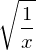

In [32]:
from sympy import *
x,y,z=symbols('x y z')
init_printing()
sqrt(1/x)

Şimdi ise bir fonksiyonun kısmi türevini alalım [Teşekkürler](https://stackoverflow.com/questions/30791504/python-partial-derivatives-easy):

In [35]:
from sympy import symbols, diff
x, y, z = symbols('x y z', real=True)
f = 4*x*y + x*sin(z) + x**3 + z**8*y
f

Yukarıdaki fonksiyonun x'e göre kısmi türevi:

In [36]:
diff(f, x)

In [41]:
theta = Symbol('theta')
theta

In [56]:
xi=Symbol('x_i')
yi=Symbol('y_i')
yi

Bir fonksiyonu hesaplatma

In [51]:
f=3*x**2
f

In [53]:
f.evalf(subs={x: 3.14})

Kendi $\theta$ değerlerimizi bulmak içim kullanılan azalan eğim yöntemi $MAE$ fonksiyonunun $\theta_j$ değerine göre kısmi türevini alırsak bu $\theta_j$ noktasındaki eğimi bulmuş oluruz. Başka bir deyimle birim $\theta_j$ karşısında maliyet fonksiyonundaki azalmayı buluruz. Bu değeri azaltarak gittiğimizde maliyet değerini en aza indiren (belki de sıfırlayan) noktayı global minimumu buluruz. Gradient Descent sürekli aşağı inerek en düşük rakımlı yeri bulmaya çalışan mantıktır.

Şimdi MAE fonksiyonumuzun kısmi türevini alarak bir deneme yapalım:

$
MAE(X,h)=\frac{1}{m}\sum \left | h(x_i)-y^{(i)}) \right |
$

$
MAE(X,h)=\frac{1}{m}\sum \left | \theta^T x^{(i)}-y^{(i)}) \right |
$

Tek bir $\theta$ değeri yerine tüm tetalar için kısmi türev alarak bunu bir vektöre tanımlayabiliriz. Bunun için Scikit Tensorflow kitabındaki 4.6 nolu eşitliği kullanırız. Bu sadece bir gradyan deseni adımı içindir.
Bu kadar uzun sürmesine rağmen halen normal eşitlikten hızlı çalışır.

![GradientDescent](C:\\Users\\suata\\Desktop\\scikit-ogren\\cheatsheets\\gradient1.png)